<a href="https://colab.research.google.com/github/sjbaek12/sjbaek12.github.io/blob/master/%EC%A3%BC%EA%B0%80%EC%98%88%EC%B8%A1_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.xls to data.xls


In [3]:
xlsx = pd.read_excel(r'data.xls')

In [ ]:
type(xlsx)
print(len(xlsx))

86


In [4]:
xlsx.tail()

,년/월/일,종가,대비,거래량(주),거래대금(원),시가,고가,저가,시가총액(백만),상장주식수(주)
81,2020/05/11,"48,400",-400,"16,357,743","797,523,862,042","48,900","49,250","48,300","288,937,475","5,969,782,550"
82,2020/05/08,"48,800",0,"15,319,700","752,271,196,120","49,100","49,350","48,800","291,325,388","5,969,782,550"
83,2020/05/07,"48,800",-400,"13,884,411","679,668,516,460","49,200","49,300","48,700","291,325,388","5,969,782,550"
84,2020/05/06,"49,200",700,"18,070,225","882,453,648,920","49,000","49,200","48,500","293,713,301","5,969,782,550"
85,2020/05/04,"48,500","-1,500","26,083,749","1,270,816,552,521","48,900","49,100","48,500","289,534,454","5,969,782,550"


In [ ]:
xlsx.head()

,년/월/일,종가,대비,거래량(주),거래대금(원),시가,고가,저가,시가총액(백만),상장주식수(주)
0,2020/09/02,"54,400",200,"16,905,723","922,056,312,614","54,600","55,100","54,100","324,756,171","5,969,782,550"
1,2020/09/01,"54,200",200,"19,363,117","1,052,420,037,800","54,100","54,800","54,100","323,562,214","5,969,782,550"
2,2020/08/31,"54,000","-1,400","32,671,367","1,786,245,513,500","56,000","56,100","54,000","322,368,258","5,969,782,550"
3,2020/08/28,"55,400",-200,"14,619,888","815,588,008,400","56,100","56,300","55,400","330,725,953","5,969,782,550"
4,2020/08/27,"55,600",-800,"16,196,568","903,860,902,050","56,300","56,300","55,600","331,919,910","5,969,782,550"


In [5]:
xlsx = xlsx.rename(columns={"년/월/일" : "day", "종가":"close", "대비":"dif", "거래량(주)":"volume", "시가":"start", "고가":"high", "저가":"low"})

In [6]:
del xlsx["거래대금(원)"]
del xlsx["시가총액(백만)"]
del xlsx["상장주식수(주)"]

In [7]:
xlsx

,day,close,dif,volume,start,high,low
0,2020/09/02,"54,400",200,"16,905,723","54,600","55,100","54,100"
1,2020/09/01,"54,200",200,"19,363,117","54,100","54,800","54,100"
2,2020/08/31,"54,000","-1,400","32,671,367","56,000","56,100","54,000"
3,2020/08/28,"55,400",-200,"14,619,888","56,100","56,300","55,400"
4,2020/08/27,"55,600",-800,"16,196,568","56,300","56,300","55,600"
...,...,...,...,...,...,...,...
81,2020/05/11,"48,400",-400,"16,357,743","48,900","49,250","48,300"
82,2020/05/08,"48,800",0,"15,319,700","49,100","49,350","48,800"
83,2020/05/07,"48,800",-400,"13,884,411","49,200","49,300","48,700"
84,2020/05/06,"49,200",700,"18,070,225","49,000","49,200","48,500"


In [8]:
sprice_s = xlsx[::-1] #데이터를 시간순서로 정렬

In [9]:
sprice_s.head()

,day,close,dif,volume,start,high,low
85,2020/05/04,"48,500","-1,500","26,083,749","48,900","49,100","48,500"
84,2020/05/06,"49,200",700,"18,070,225","49,000","49,200","48,500"
83,2020/05/07,"48,800",-400,"13,884,411","49,200","49,300","48,700"
82,2020/05/08,"48,800",0,"15,319,700","49,100","49,350","48,800"
81,2020/05/11,"48,400",-400,"16,357,743","48,900","49,250","48,300"


In [10]:
import numpy as np

In [11]:
for i in range(0, len(sprice_s)):
  sprice_s.loc[i, 'close'] = float(sprice_s.loc[i, 'close'].replace(",", ''))
  sprice_s.loc[i, 'dif'] = float(sprice_s.loc[i, 'dif'].replace(",", ''))
  sprice_s.loc[i, 'volume'] = float(sprice_s.loc[i, 'volume'].replace(",", ''))
  sprice_s.loc[i, 'start'] = float(sprice_s.loc[i, 'start'].replace(",", ''))
  sprice_s.loc[i, 'high'] = float(sprice_s.loc[i, 'high'].replace(",", ''))
  sprice_s.loc[i, 'low'] = float(sprice_s.loc[i, 'low'].replace(",", ''))
 

In [12]:
sprice_s

,day,close,dif,volume,start,high,low
85,2020/05/04,48500,-1500,2.60837e+07,48900,49100,48500
84,2020/05/06,49200,700,1.80702e+07,49000,49200,48500
83,2020/05/07,48800,-400,1.38844e+07,49200,49300,48700
82,2020/05/08,48800,0,1.53197e+07,49100,49350,48800
81,2020/05/11,48400,-400,1.63577e+07,48900,49250,48300
...,...,...,...,...,...,...,...
4,2020/08/27,55600,-800,1.61966e+07,56300,56300,55600
3,2020/08/28,55400,-200,1.46199e+07,56100,56300,55400
2,2020/08/31,54000,-1400,3.26714e+07,56000,56100,54000
1,2020/09/01,54200,200,1.93631e+07,54100,54800,54100


Scaling 작업이다. 이것이 없으면 LSTM은 작동하지 않는다.

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()
scale_cols = ['close', 'dif', 'volume', 'start', 'high', 'low']
sprice_s = scaler.fit_transform(sprice_s[scale_cols])

In [15]:
sprice_s = pd.DataFrame(sprice_s) 

In [16]:
sprice_s.columns = scale_cols

In [17]:
sprice_s[0:1]

,close,dif,volume,start,high,low
0,0.058296,0.163636,0.408246,0.126437,0.081301,0.110169


In [ ]:
print(scaler.inverse_transform(sprice_s[0:1])) # scale값을 역으로 변환한다.

[[ 4.8500000e+04 -1.5000000e+03  2.6083749e+07  4.8900000e+04
   4.9100000e+04  4.8500000e+04]]


In [ ]:
print("{0:.2f}".format(4.8500000e+04),"{0:.2f}".format(-1.5000000e+03),"{0:.2f}".format(2.6083749e+07),"{0:.2f}".format(4.8900000e+04) )

48500.00 -1500.00 26083749.00 48900.00


로컬 PC에 데이터를 저장하는 방법이다.

In [18]:
sprice_s.to_csv('new_file.txt')
files.download('new_file.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
uploaded = files.upload()

Saving new_file (7).txt to new_file (7).txt


In [20]:
data = pd.read_csv('new_file.txt')

In [21]:
data

,Unnamed: 0,close,dif,volume,start,high,low
0,0,0.058296,0.163636,0.408246,0.126437,0.081301,0.110169
1,1,0.121076,0.563636,0.203619,0.134100,0.089431,0.110169
2,2,0.085202,0.363636,0.096733,0.149425,0.097561,0.127119
3,3,0.085202,0.436364,0.133384,0.141762,0.101626,0.135593
4,4,0.049327,0.363636,0.159890,0.126437,0.093496,0.093220
...,...,...,...,...,...,...,...
81,81,0.695067,0.290909,0.155775,0.693487,0.666667,0.711864
82,82,0.677130,0.400000,0.115514,0.678161,0.666667,0.694915
83,83,0.551570,0.181818,0.576462,0.670498,0.650407,0.576271
84,84,0.569507,0.472727,0.236633,0.524904,0.544715,0.584746


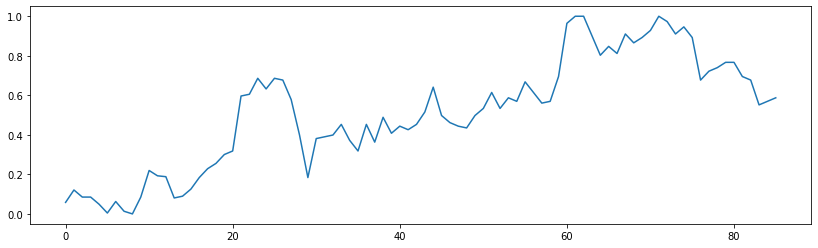

In [22]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.plot(data['close'])
plt.show()

In [ ]:
data.loc[0,'day']

'2020/05/04'

In [23]:
y_data = data.loc[0:85, 'close']  # y는 종가의 차이로 전날에 영향을 받는다고 가정한다

In [24]:
y_data = np.array(y_data)

In [25]:
y_data 

array([0.05829596, 0.12107623, 0.08520179, 0.08520179, 0.04932735,
       0.0044843 , 0.06278027, 0.01345291, 0.        , 0.08520179,
       0.21973094, 0.19282511, 0.18834081, 0.08071749, 0.0896861 ,
       0.12556054, 0.1838565 , 0.22869955, 0.25560538, 0.30044843,
       0.31838565, 0.59641256, 0.60538117, 0.68609865, 0.632287  ,
       0.68609865, 0.67713004, 0.57847534, 0.39910314, 0.1838565 ,
       0.38116592, 0.39013453, 0.39910314, 0.4529148 , 0.37219731,
       0.31838565, 0.4529148 , 0.3632287 , 0.48878924, 0.40807175,
       0.44394619, 0.42600897, 0.4529148 , 0.51569507, 0.64125561,
       0.49775785, 0.46188341, 0.44394619, 0.43497758, 0.49775785,
       0.53363229, 0.61434978, 0.53363229, 0.58744395, 0.56950673,
       0.66816143, 0.61434978, 0.56053812, 0.56950673, 0.69506726,
       0.96412556, 1.        , 1.        , 0.90134529, 0.80269058,
       0.84753363, 0.81165919, 0.9103139 , 0.86547085, 0.89237668,
       0.92825112, 1.        , 0.97309417, 0.9103139 , 0.94618

In [26]:
price_serise=[]
for i in range(len(y_data)-4):
  price = [y_data[i], y_data[i+1], y_data[i+2], y_data[i+3], y_data[i+4]]
  price_serise.append(price)

In [27]:
y = y_data[5:]
x = price_serise[:81]

print(y[0])
print(x[0])

0.004484304932734773
[0.05829596412556004, 0.12107623318385576, 0.08520179372197312, 0.08520179372197312, 0.049327354260089606]


In [28]:
print(y[-1])
print(x[-1])

0.5874439461883405
[0.7668161434977572, 0.695067264573991, 0.6771300448430493, 0.551569506726457, 0.5695067264573987]


In [30]:
x = np.array(x)
len(x)

81

In [31]:
x = x.reshape(81,5,1)

In [32]:
y = y.reshape(81,1)

In [33]:
y = np.array(y)

In [34]:
x_train = x[0:70]
x_val = x[70:]

In [35]:
y_train = y[0:70]
y_val = y[70:]

In [36]:
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)


import tensorflow as tf

import numpy as np

from tensorflow import keras
import keras.layers as layers
from keras.layers import Dense, LSTM,Input
from keras.models import Model
from keras.optimizers import Adam
import keras.backend as K 

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [37]:
def policy_model_lstm (lr):
  inp_L = layers.Input(shape=(5,1))  # 타입스텝수 5개, 특성개수 1개
  dense_1 = LSTM(5)(inp_L)
  dense_2 = Dense(128)(dense_1) 
  dense_L = Dense(64)(dense_2) 
  output_s = layers.Dense(1)(dense_L)

  model_train = Model(inputs=inp_L, outputs = output_s)
  model_train.compile(loss='mse', optimizer=Adam(lr), metrics = ['mae'])
  return model_train 

In [38]:
model_train_test = policy_model_lstm(0.01)

In [39]:
model_train_test.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5, 1)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 5)                 140       
_________________________________________________________________
dense (Dense)                (None, 128)               768       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 9,229
Trainable params: 9,229
Non-trainable params: 0
_________________________________________________________________


In [40]:
history_test = model_train_test.fit(x_train, y_train, validation_data = (x_val, y_val ),  epochs=100, verbose=0)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


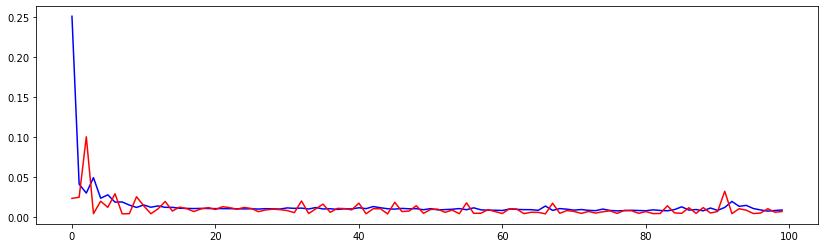

In [41]:
plt.plot(history_test.history['loss'], 'b') 
plt.plot(history_test.history['val_loss'], 'r')
plt.show()

In [42]:
y_hat = model_train_test.predict(x_val)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


In [ ]:
y_hat

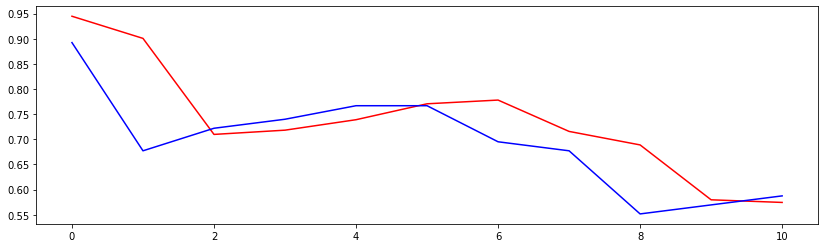

In [43]:
plt.plot(y_hat, 'r') 
plt.plot(y_val, 'b')
plt.show()

여기부터 정책신경망 이다

In [ ]:
class Agent(object):
  def __init__(self, alpha, beta, gamma= 0.99, n_actions=2, layer1_size=10, layer2_size=64, layer3_size=64, input_dims=5, fname='reinforce.h5'):
    self.gamma = gamma
    self.alpha = alpha
    self.beta = beta
    self.input_dims = input_dims
    self.fc1_dims = layer1_size
    self.fc2_dims = layer2_size
    self.fc3_dims = layer3_size
    self.n_actions = n_actions
    self.balance = [100, 0, 0]

    self.actor, self.critic, self.policy = self.build_actor_critic_network()
    self.action_space = [i for i in range(n_actions)]
    self.model_file = fname
     
  def build_actor_critic_network(self):
   # actor와 critic이 신경망 몸체를 공유하는 구조임

    input=Input(shape=(5,1))
    delta = Input(shape=[1])
    dense1 = LSTM(self.fc1_dims)(input)
    dense2 = Dense(self.fc2_dims)(dense1)
    dense3 = Dense(self.fc3_dims)(dense2)
    probs = Dense(self.n_actions, activation='softmax')(dense3)
    values = Dense(1, activation='linear')(dense3)

    def custom_loss(y_true, y_pred):
      out = K.clip(y_pred, 1e-8, 1-1e-8)
      log_lik = K.sum(y_true*K.log(out), axis=1)*delta
      return - log_lik
   
    actor = Model(inputs=[input, delta], outputs = [probs]) # [] 필요여부 체크
    actor.compile(optimizer = Adam(lr=self.alpha), loss=custom_loss)
    
    critic = Model(inputs = [input], outputs = [values])
    critic.compile(optimizer = Adam(lr=self.beta), loss='mse')
   
    policy = Model(inputs = [input], outputs = [probs]) # compile이 필요없다

    return actor, critic, policy

  def choose_action(self, observation):
    state = observation[np.newaxis, :] # [1.0, 1.0]을 [[1.0, 1.0]]와 같이 한축을 추가한다.
    probabilities = self.policy.predict(state)[0]
    action = np.random.choice(self.action_space, p=probabilities)
    return action


  #고처야 하는 부분 Price 인식이 다른다.

  def validate_action(self, action, observation, price):
#    price = observation[4]
    if action == 0:  # 0은 매수, 1은 보류, 2는 매도
      if self.balance[0] - price < 0:
        action_validated = 1
      else:
        action_validated = 0        
    if action == 1:
      if self.balance[2] > 0 :
        action_validated = 2
      else:
        action_validated = 1
    before_act_balance = [self.balance[0], self.balance[1], self.balance[2]] 

    return action_validated, before_act_balance  

  def balance_update(self, observation, action_validated, price):
#    price = observation[4]
    if action_validated == 0:
      self.balance[0] = self.balance[0] - price
      self.balance[1] = price
      self.balance[2] = self.balance[2] + 1
    if action_validated == 1:
      self.balance[1] = price
    if action_validated == 2:
      self.balance[0] = self.balance[0] + price
      self.balance[1] = price
      self.balance[2] = self.balance[2] -1
    balance_updated = [self.balance[0], self.balance[1], self.balance[2]]
    present_value = self.balance[0] + self.balance[1] * self.balance[2]
    return balance_updated, present_value

  def pv_ratio(self, before_act_balance, balance_updated):
    pv_ratio = (balance_updated[0] + balance_updated[1] * balance_updated[2])/(before_act_balance[0] + before_act_balance[1] * before_act_balance[2])
    if pv_ratio > 1.0:
      reward = 1
    else:
      reward = 0
    return pv_ratio, reward

  def hold_ratio(self, balance_updated, observation, present_value, price):  # 주식보유 비율
#    price = observation[4] 
    hold_ratio = balance_updated[2] / (present_value / price)
    return hold_ratio


  def learn(self, state, action, reward, state_, done): 

    # action은 choose_action 함수로부터, state는 환경으로 부터, state_은 새롭게 받은 다음 step의 환경
    # reward는 state_와 같이 환경으로부터 받는 다음 step의 reward 
    # done은 환경으로부터 받는 episode의 종료여부

    state = state[np.newaxis, :]
    state_ = state_[np.newaxis, :]  

    critic_value_ = self.critic.predict(state_)
    critic_value = self.critic.predict(state)

    
    # t시점의 신경망으로 현재 state의 value와 t+1 시점의 value를 계산 

    target = reward + self.gamma*critic_value_*(1-int(done))  # int(False) == 0
    delta = target - critic_value

        
    actions = np.zeros([1, self.n_actions])
    actions[np.arange(1), action] = 1.0 # action memory 길이만큼 zero 리스트를 만들고, 각 리스트에 선택한 행동에 1을 넣어준다

    self.actor.fit([state, delta], actions, verbose=0)
    self.critic.fit(state, target, verbose=0)
     


  def reset_balance(self):
    self.balance = [100,0,0]


여기부터는 학습의 영역이다.

In [ ]:
# random action과 신경망의 선택 action을 조정해야 한다.


num_episode = 0.0
num_episodes = 100.0

agent = Agent(alpha = 0.0001, beta = 0.0001)

while num_episode < num_episodes:

  action_history = []
  wealth_history = []
  agent.reset_balance()

  for i in range(len(x)):

    if i < (len(x)-1):
      done = False    
      observation = x[i]
      observation_ = x[i+1]
      price = y[i]
      action = agent.choose_action(observation)
      action_validated, before_act_balance = agent.validate_action(action, observation, price)
      balance_updated, present_value=agent.balance_update(observation, action_validated, price)
      pv_ratio, reward = agent.pv_ratio(before_act_balance, balance_updated)
      hold_ratio = agent.hold_ratio(balance_updated, observation, present_value, price)
   
      action_history.append(action)
      wealth_history.append(present_value)

      if (reward == 1): 
        agent.learn(observation, action, reward, observation_, done)
      continue

  
  if (num_episode+1) % 20 == 0:
    print(wealth_history[-1])

  num_episode += 1.0

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: RuntimeWarning: divide by zero encountered in true_divide


[101.4529148]
[101.81165919]
[102.56502242]
[102.56502242]
[102.56502242]


In [ ]:
data.loc[0,:] # y_data의 validation 기준일은 20년 1월 21이고 종가는 61400원이고 전날 대비 1000원 하락했다.

Unnamed: 0             85
day            2020/05/04
close               48500
dif                 -1500
volume        2.60837e+07
start               48900
high                49100
low                 48500
Name: 0, dtype: object

In [ ]:
x_data = data.loc[0:85, ['close', 'volume', 'start', 'high', 'low']]

In [ ]:
x_data

,close,volume,start,high,low
0,48500.0,26083749.0,48900.0,49100.0,48500.0
1,49200.0,18070225.0,49000.0,49200.0,48500.0
2,48800.0,13884411.0,49200.0,49300.0,48700.0
3,48800.0,15319700.0,49100.0,49350.0,48800.0
4,48400.0,16357743.0,48900.0,49250.0,48300.0
...,...,...,...,...,...
81,55600.0,16196568.0,56300.0,56300.0,55600.0
82,55400.0,14619888.0,56100.0,56300.0,55400.0
83,54000.0,32671367.0,56000.0,56100.0,54000.0
84,54200.0,19363117.0,54100.0,54800.0,54100.0


In [ ]:
x_data  = np.asarray(x_data, dtype=float)

In [ ]:
y_data  = np.asarray(y_data, dtype=float)

In [ ]:
print(x_data.shape, y_data.shape)

(86, 4) (86,)


In [ ]:
x_train = x_data[0:50]
x_val = x_data[50:85]
print(x_train.shape, x_val.shape)

(50, 4) (35, 4)


In [ ]:
y_train = y_data[0:50]
y_val = y_data[50:85]

In [ ]:
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)

x_train = (x_train-mean)/std

x_val = (x_val-mean)/std

In [ ]:
x_train.shape

(50, 1, 4)

In [ ]:
x_train = x_train.reshape(-1,1,4) 
x_val = x_val.reshape(-1,1,4) # LSTM으로 들어가기 위해서 자료의 형태를 맞추어 준다. (샘플수, 타입스텝 수, 각 타입스텝의 특성수 )

In [ ]:
x_train[0]

array([[ 0.71566152, -1.13639348, -1.2416974 , -1.14741206]])

In [ ]:
print(x_train.shape)

(50, 1, 4)


In [ ]:
history = model.fit(x, y, validation_data = (x_val, y_val), epochs=200, verbose=0)

In [ ]:
data.loc[400,:] #20년 1월20일 종가는 62400원이었다

Unnamed: 0                      400
Unnamed: 0.1                    110
day             2020-01-20 00:00:00
close                         62400
dif                            1100
volume                  1.25289e+07
start                         62000
high                          62800
low                           61700
Name: 400, dtype: object

In [ ]:
price_hats = []
price_start = 62400.0

for i in range(0, len(y_hat)):
  price_start = price_start + y_hat[i]
  price_hats.append(price_start)


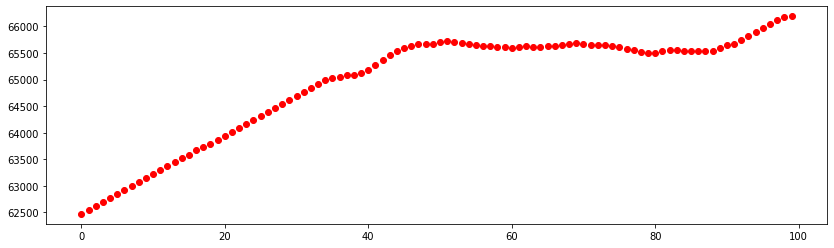

In [ ]:
plt.plot(price_hats, 'ro')
plt.show()

In [ ]:
 data.loc[401:500,['day','close']] # 20년 1월21일 부터 시작하여 100일간 종가 필요

,day,close
401,2020-01-21 00:00:00,61400.0
402,2020-01-22 00:00:00,62300.0
403,2020-01-23 00:00:00,60800.0
404,2020-01-28 00:00:00,58800.0
405,2020-01-29 00:00:00,59100.0
...,...,...
496,2020-06-10 00:00:00,55400.0
497,2020-06-11 00:00:00,54300.0
498,2020-06-12 00:00:00,52300.0
499,2020-06-15 00:00:00,49900.0


In [ ]:
price_real = data.loc[401:500, 'close']
price_real = np.asarray(price_real, dtype=float)

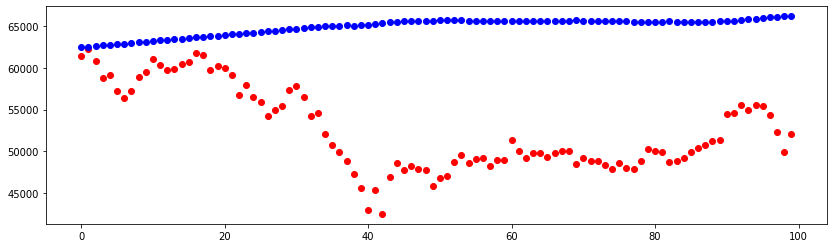

In [ ]:
plt.plot(price_real, 'ro')
plt.plot(price_hats, 'bo')
plt.show()

아래는 Colab 구글 드라이브에 Data를 저장하고 다운로드 하는 방법이다.

In [ ]:
from google.colab import drive
drive.mount('/gdrive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
!ls

sample_data


In [ ]:
!ls /gdrive

'My Drive'


In [ ]:
data.to_csv('/gdrive/My Drive/data.txt') # 구글 드라이브에 저장한다.

In [ ]:
!ls /gdrive/My\ Drive/data.txt

'/gdrive/My Drive/data.txt'


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/gdrive/My Drive/data.txt')

In [ ]:
data.tail(10) # 2018년 6월1일부터 2020년 6월30일까지 삼성전자 주가 자료이다

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,day,close,dif,volume,start,high,low
501,501,501,9,2020-06-17 00:00:00,52200.0,100.0,26672595.0,52100.0,52900.0,51300.0
502,502,502,8,2020-06-18 00:00:00,52300.0,100.0,15982926.0,52200.0,52300.0,51600.0
503,503,503,7,2020-06-19 00:00:00,52900.0,600.0,18157985.0,52600.0,52900.0,51600.0
504,504,504,6,2020-06-22 00:00:00,52000.0,-900.0,13801350.0,52000.0,52600.0,51800.0
505,505,505,5,2020-06-23 00:00:00,51400.0,-600.0,18086152.0,52500.0,52800.0,51100.0
506,506,506,4,2020-06-24 00:00:00,52900.0,1500.0,24519552.0,51900.0,53900.0,51600.0
507,507,507,3,2020-06-25 00:00:00,51900.0,-1000.0,18541624.0,52100.0,53000.0,51900.0
508,508,508,2,2020-06-26 00:00:00,53300.0,1400.0,21575360.0,52800.0,53900.0,52200.0
509,509,509,1,2020-06-29 00:00:00,52400.0,-900.0,17776925.0,52500.0,53200.0,52000.0
510,510,510,0,2020-06-30 00:00:00,52800.0,400.0,21157172.0,53900.0,53900.0,52800.0


다른 data 셀을 만들려고 한다.

In [ ]:
data_n = data.loc[:, ["close", "volume", "start", "high", "low"]]

In [ ]:
data_n

,close,volume,start,high,low
0,51300.0,13038499.0,50500.0,51700.0,49950.0
1,51100.0,9767171.0,50800.0,51200.0,50700.0
2,51300.0,9144100.0,51100.0,51400.0,50400.0
3,50600.0,13590016.0,51800.0,51800.0,50500.0
4,49650.0,16951706.0,50200.0,50400.0,49600.0
...,...,...,...,...,...
506,52900.0,24519552.0,51900.0,53900.0,51600.0
507,51900.0,18541624.0,52100.0,53000.0,51900.0
508,53300.0,21575360.0,52800.0,53900.0,52200.0
509,52400.0,17776925.0,52500.0,53200.0,52000.0


In [ ]:
import numpy as np

In [ ]:
# TR 지표를 사용하여 변동성 데이터 만들기, TR은 방향 없이 변동성의 크기만 나타낸다. TR이 작을때 주가는 안정적이다. 
# TR는 주가만 사용하고, 주가의 방향보다는 변동성만 계산하는 지표이다.

tr_list=[]

for i in range(0, len(data_n)):
  if i == 0:
    tr = data_n.loc[i, 'high'] - data_n.loc[i, 'low']
  else:
    tr1 = data_n.loc[i, 'high'] - data_n.loc[i, 'low']
    tr2 = data_n.loc[i, 'high'] - data_n.loc[i-1, 'close']
    tr3 = data_n.loc[i, 'low'] - data_n.loc[i-1, 'close']
    tr = max(tr1, abs(tr2), abs(tr3))
  tr_list.append(tr)


In [ ]:
tr_list[0]

1750.0

In [ ]:
for i in range(0, len(data_n)):
  data_n.loc[i,'tr'] = tr_list[i]

In [ ]:
data_n.head()

,close,volume,start,high,low,tr
0,51300.0,13038499.0,50500.0,51700.0,49950.0,1750.0
1,51100.0,9767171.0,50800.0,51200.0,50700.0,600.0
2,51300.0,9144100.0,51100.0,51400.0,50400.0,1000.0
3,50600.0,13590016.0,51800.0,51800.0,50500.0,1300.0
4,49650.0,16951706.0,50200.0,50400.0,49600.0,1000.0


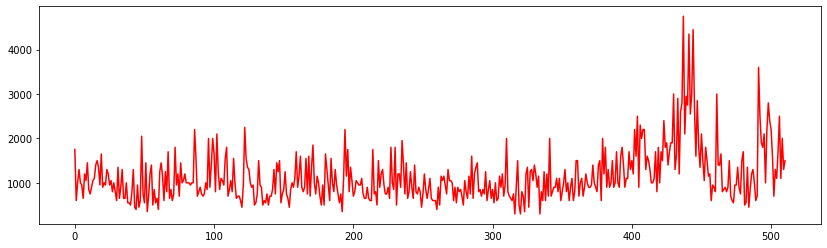

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,4)

plt.plot(tr_list, 'r')
plt.show()

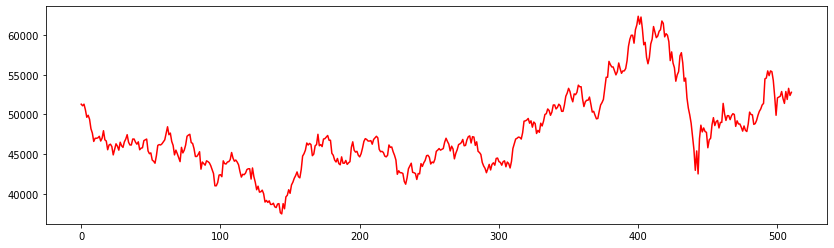

In [ ]:
plt.plot(data_n.loc[:,'close'], 'r')
plt.show()

In [ ]:
# 거래량 지표인 obv를 계산한다. 전일 종가보다 금일 종가가 높다면 전일 obv에 금일 거래량을 더해주고, 전일 종가보다 금일 종가가 낮다면 거래량을 전일 obv에서 차감한다.
# obv가 증가한다는 것은 매수 세력이 이겼다는 것(주가상승)을 의미하고 obv가 하락하면 매도세력(주가하락)이 이긴 것을 의미한다.
# obv는 주가변화에 선행한다. 그러나 변화가 발생하는 경우가 있다.
# 주가는 상승추세지만 obv가 횡보라면 공매도 신호로 이후 주가 하락 신호
# 반대로 주가는 횡보이지만 obs가 상승세라면 이후 주가 상승 신호 

obv=0

obvs=[]

for i in range(0, len(data_n)):
  if i == 0 :
    obv = 0
  elif data_n.loc[i, 'close'] - data_n.loc[i-1, 'close'] > 0 :
    obv = obv + data_n.loc[i, 'volume']
  else:
    obv = obv - data_n.loc[i, 'volume']
  obvs.append(obv)

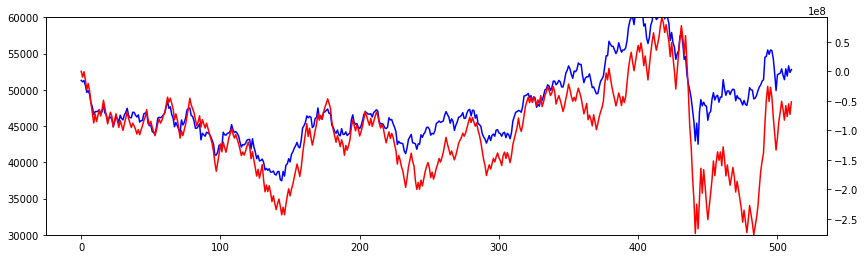

In [ ]:
# 주가와 obv를 하나의 차트로 본다

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

line1 = ax1.plot(np.arange(len(obvs)), data_n.loc[:,'close'], color='b')
line2 = ax2.plot(np.arange(len(obvs)), obvs, color='r')

ax1.set_ylim(30000, 60000)
ax2.set_ylim( np.min(obvs), np.max(obvs))

plt.show()

In [ ]:
for i in range(0, len(data_n)):
  data_n.loc[i,'obv'] = obvs[i]

In [ ]:
data_n.head()

,close,volume,start,high,low,tr,obv
0,51300.0,13038499.0,50500.0,51700.0,49950.0,1750.0,0.0
1,51100.0,9767171.0,50800.0,51200.0,50700.0,600.0,-9767171.0
2,51300.0,9144100.0,51100.0,51400.0,50400.0,1000.0,-623071.0
3,50600.0,13590016.0,51800.0,51800.0,50500.0,1300.0,-14213087.0
4,49650.0,16951706.0,50200.0,50400.0,49600.0,1000.0,-31164793.0


In [ ]:
data_n = np.asarray(data_n, dtype=float)

In [ ]:
data_n[0:5]

array([[ 5.1300000e+04,  1.3038499e+07,  5.0500000e+04,  5.1700000e+04,
         4.9950000e+04,  1.7500000e+03,  0.0000000e+00],
       [ 5.1100000e+04,  9.7671710e+06,  5.0800000e+04,  5.1200000e+04,
         5.0700000e+04,  6.0000000e+02, -9.7671710e+06],
       [ 5.1300000e+04,  9.1441000e+06,  5.1100000e+04,  5.1400000e+04,
         5.0400000e+04,  1.0000000e+03, -6.2307100e+05],
       [ 5.0600000e+04,  1.3590016e+07,  5.1800000e+04,  5.1800000e+04,
         5.0500000e+04,  1.3000000e+03, -1.4213087e+07],
       [ 4.9650000e+04,  1.6951706e+07,  5.0200000e+04,  5.0400000e+04,
         4.9600000e+04,  1.0000000e+03, -3.1164793e+07]])

In [ ]:
data_n.shape

(511, 7)

5일치 주가를 타입스텝으로 가진 데이터를 만들려고 한다. 이경우 RNN과 같이 전체 데이터는 5개의 특징을 가진 샘플데이터가 한꺼번에 LSTM네트워크에 들어가고 타입스템 수 만큼 학습이 진행된다.

In [ ]:
data_n_L = []

for i in range(0, len(data_n)):
  if i < len(data_n)-4:
    ts = [data_n[i], data_n[i+1], data_n[i+2], data_n[i+3], data_n[i+4]]
    data_n_L.append(ts)

In [ ]:
data_n_L[0]

[array([5.1300000e+04, 1.3038499e+07, 5.0500000e+04, 5.1700000e+04,
        4.9950000e+04, 1.7500000e+03, 0.0000000e+00]),
 array([ 5.110000e+04,  9.767171e+06,  5.080000e+04,  5.120000e+04,
         5.070000e+04,  6.000000e+02, -9.767171e+06]),
 array([ 5.13000e+04,  9.14410e+06,  5.11000e+04,  5.14000e+04,
         5.04000e+04,  1.00000e+03, -6.23071e+05]),
 array([ 5.0600000e+04,  1.3590016e+07,  5.1800000e+04,  5.1800000e+04,
         5.0500000e+04,  1.3000000e+03, -1.4213087e+07]),
 array([ 4.9650000e+04,  1.6951706e+07,  5.0200000e+04,  5.0400000e+04,
         4.9600000e+04,  1.0000000e+03, -3.1164793e+07])]

In [ ]:
np.asarray(data_n_L).shape

(507, 5, 7)

In [ ]:
len(data_n_L) # 이후 총 507개 데이터 중에서 0~399는 훈련, 400~499는 validation 500~은 test로 활용하려고 한다.

507

In [ ]:
data_n_d = data.loc[:, ["dif"]]

In [ ]:
len(data_n_d)

511

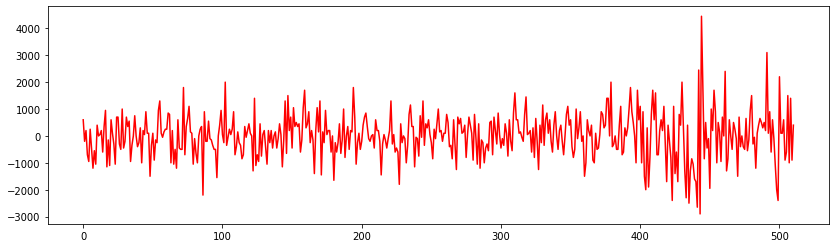

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,4)

plt.plot(data_n_d, 'r')
plt.show()

In [ ]:
np.std(data_n_d[400:]) #400번이후의 표준편차가 더 크다

dif    1257.926576
dtype: float64

In [ ]:
data_n_d.head(6)

,dif
0,600.0
1,-200.0
2,200.0
3,-700.0
4,-950.0
5,250.0


In [ ]:
data_n_d_L = data_n_d[5:] # 5일 전 데이타가 x 이고 이를 가지고 익일 y를 추정하는 것이라 하루 지난 값이 y가 된다.

In [ ]:
data_n_d_L = np.asarray(data_n_d_L, dtype=float)

In [ ]:
[data_n_L[0], data_n_d_L[0]]

[[array([5.1300000e+04, 1.3038499e+07, 5.0500000e+04, 5.1700000e+04,
         4.9950000e+04, 1.7500000e+03, 0.0000000e+00]),
  array([ 5.110000e+04,  9.767171e+06,  5.080000e+04,  5.120000e+04,
          5.070000e+04,  6.000000e+02, -9.767171e+06]),
  array([ 5.13000e+04,  9.14410e+06,  5.11000e+04,  5.14000e+04,
          5.04000e+04,  1.00000e+03, -6.23071e+05]),
  array([ 5.0600000e+04,  1.3590016e+07,  5.1800000e+04,  5.1800000e+04,
          5.0500000e+04,  1.3000000e+03, -1.4213087e+07]),
  array([ 4.9650000e+04,  1.6951706e+07,  5.0200000e+04,  5.0400000e+04,
          4.9600000e+04,  1.0000000e+03, -3.1164793e+07])],
 array([250.])]

In [ ]:
len(data_n_d_L) # y가 익일 데이터이므로 전체 자료수는 x보다 한개 작다. 총 데이터가 511인데 511-5는 506개이다.

506

In [ ]:
x_train_L5 = data_n_L[0:400]
x_val_L5 = data_n_L[400:500]
x_test_L5 = data_n_L[500:]
y_train_L5= data_n_d_L[0:400]
y_val_L5 = data_n_d_L[400:500]

In [ ]:
print(len(x_train_L5), len(x_val_L5), len(x_test_L5))

400 100 7


In [ ]:
print(y_val_L5[0], x_val_L5[0][4]) 

[300.] [5.8800000e+04 2.3664541e+07 5.9400000e+04 5.9400000e+04 5.8300000e+04
 2.5000000e+03 9.5160040e+06]


In [ ]:
data[400:410] # y_val_L5는 20년 1월29일부터 시작하고, 전날의 종가는 58800원이다

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,day,close,dif,volume,start,high,low
400,400,400,110,2020-01-20 00:00:00,62400.0,1100.0,12528855.0,62000.0,62800.0,61700.0
401,401,401,109,2020-01-21 00:00:00,61400.0,-1000.0,11142693.0,62000.0,62400.0,61200.0
402,402,402,108,2020-01-22 00:00:00,62300.0,900.0,15339565.0,60500.0,62600.0,60400.0
403,403,403,107,2020-01-23 00:00:00,60800.0,-1500.0,14916555.0,61800.0,61800.0,60700.0
404,404,404,106,2020-01-28 00:00:00,58800.0,-2000.0,23664541.0,59400.0,59400.0,58300.0
405,405,405,105,2020-01-29 00:00:00,59100.0,300.0,16446102.0,59100.0,59700.0,58800.0
406,406,406,104,2020-01-30 00:00:00,57200.0,-1900.0,20821939.0,58800.0,58800.0,56800.0
407,407,407,103,2020-01-31 00:00:00,56400.0,-800.0,19749457.0,57800.0,58400.0,56400.0
408,408,408,102,2020-02-03 00:00:00,57200.0,800.0,23995260.0,55500.0,57400.0,55200.0
409,409,409,101,2020-02-04 00:00:00,58900.0,1700.0,21800192.0,57100.0,59000.0,56800.0


정규화를 한다.

In [ ]:
mean_L5 = np.mean(x_train_L5, axis=0)
std_L5 = np.std(x_train_L5, axis=0)

x_train_L5_r = (x_train_L5 - mean_L5)/std_L5
x_val_L5_r = (x_val_L5 - mean_L5)/std_L5
x_test_L5_r = (x_test_L5 - mean_L5)/std_L5

In [ ]:
#import numpy as np

import keras
from keras.layers import LSTM, Dense, Input, Dropout, Conv2D, Conv1D, GlobalMaxPooling2D, MaxPooling2D,  MaxPooling1D, Flatten
from keras import Model
#from keras.models import Sequential
#from keras import layers
from keras import Input
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


In [ ]:
print(keras.__version__)
print(tf.__version__)

2.3.1
2.2.0


In [ ]:
# 아래의 LSTM은 5개의 time step이 입력되고 이에 대해서 한개의 dif가 대응되는 many-to-one이다. return_sequence=False이다.
# 만약 many-to-many로 진행될 경우, dif가 여러개 dif가 대응된다. 이경우 return_sequence=True이다. 

input2 = Input(shape=(5,7))
dense2 = LSTM(128, return_sequences=False)(input2)
dense2 = Dense(128)(dense2)
dense2 = Dense(64)(dense2)
dense2 = Dropout(0.5)(dense2)
dense2 = Dense(32)(dense2)
output2 = Dense(1)(dense2)

model = Model(inputs= input2, outputs=output2)
model.summary() # LSTM은 (5*128 + 128*128 + 128)을 가진 4개 게이트를 가지므로 68608개 파라미터를 가진다.

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 5, 7)              0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               69632     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33  

In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=0.001)


In [ ]:
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

modelcheckpoint는 epoch 중에서 가장 좋은 웨이트를 저장하고, early stopping은 모니터 지표가 개선되지 않은면 epoch를 중단한다. 

In [ ]:
callback_list = ModelCheckpoint(filepath='my_model.h5', monitor='val_mae', save_best_only=True, save_weights_only=True, verbose=0)
early_stopping = EarlyStopping(monitor='val_mae', patience=50)
history = model.fit(x_train_L5_r, y_train_L5, validation_data = (x_val_L5_r, y_val_L5), epochs=200, verbose=0, callbacks=[callback_list, early_stopping])

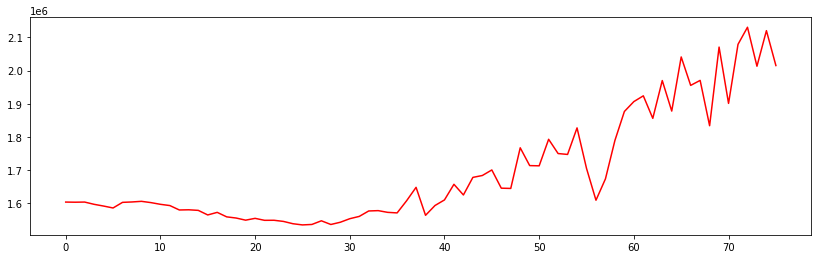

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,4)


#plt.plot(history.history['loss'], 'b') 
plt.plot(history.history['val_loss'], 'r')
plt.show()

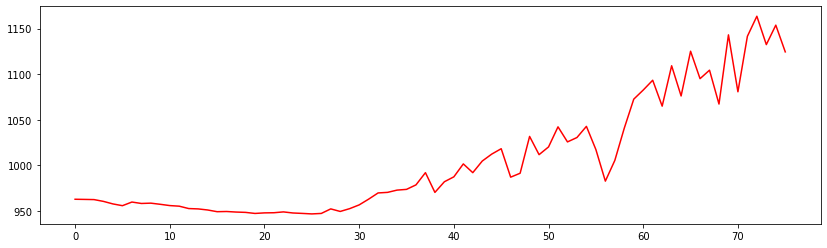

In [ ]:
#plt.plot(history.history['mae'], 'b') 
plt.plot(history.history['val_mae'], 'r')
plt.show()

In [ ]:
np.min(history.history['val_mae']) # validation set에서 최저 mae값

946.73388671875

In [ ]:
history.history['val_mae'][-1]

1268.6666259765625

In [ ]:
model.save_weights("my_model.h5") 
# 모델을 다시 저장하면 않될 수 도 있다. 최초에 한번 저장하고 난후, 그 다음부터는 callback과 fitting을 순차적으로 진행하면 자동으로 가충치는 LSTM에 저장된다. 

In [ ]:
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

In [ ]:
model.load_weights("my_model.h5") # 저장된 weight를 기존 모델에 적용한다.

In [ ]:
model.evaluate(x_val_L5_r, y_val_L5, verbose=0) # 이전에 가중치를 그대로 사용하려면 fit을 다시 하면 안되고 evaluate하여야 한다.

[1735265.6575, 1015.9922485351562]

In [ ]:
import os
print(os.getcwd())
print(os.listdir())  # 현재 working인 content 아래에 my_model.h5가 저장되어 있다.

/content
['.config', 'my_model.h5', 'sample_data']


In [ ]:
predict_val = model.predict(x_val_L5_r)

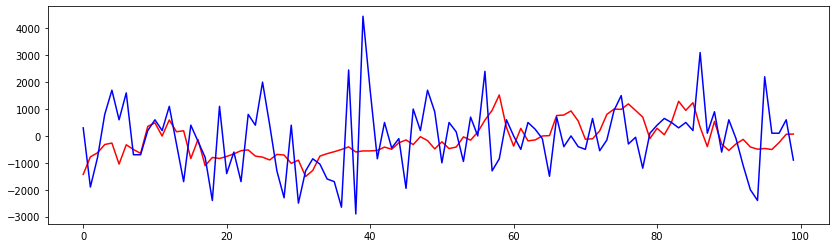

In [ ]:
plt.plot(predict_val, 'r')
plt.plot(y_val_L5, 'b')
plt.show()

In [ ]:
len(predict_val)

100

predict_price는 validation set에서 가격변동을 예측하고, validation set에서 시작하는 최초 가격에 계속 가격변동을 반영하는 방법이다. 

predict_price는 validation set에서 산출된 예상 가격변동을 매일 하루씩 발생하는 x 데이터에 반영하는 방법이다.

In [ ]:
p_val= 58800
predict_price=[]

for i in range(0, len(predict_val)):
  p_val = p_val + predict_val[i]
  predict_price.append(p_val)

In [ ]:
predict_price1=[]

for i in range(0, len(predict_val)):
  p_val = x_val_L5[i][0][0] + predict_val[i]
  predict_price1.append(p_val)

In [ ]:
actual = np.asarray(data.loc[405:, 'close'], dtype=float)

사실, price_predict는 현실에서 의미가 없다. 왜냐하면 validation set을 가지고 가격폭을 산출한 것으로 이것은 미래 데이터를 가지고 가격변동을 예측한 것고 같기 때문이다. 이것은 넌센스이고 아무런 의미가 없다. 
price_predict1은 매일 다음날의 가격변동을 예측하는 방법이다.그리고 다음날 예상 가격변동 + 금일 종가를 계산해서 다음날 가격을 예측하는 것이다. 그림을 보면 예측치가 후행하는 것으로 나온다. 그러나 이렇게 후행하는 것으로 보이는 것도 착각이다. 가격이 뚜렸히 하락이나 상승 추세가 없이 보합세인 경우, 예측값과 실제 값은 규칙성없이 움직인다.  

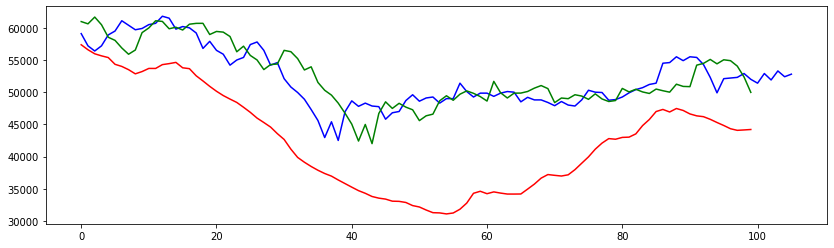

In [ ]:
plt.plot(predict_price, 'r')
plt.plot(actual, 'b')
plt.plot(predict_price1, 'g')
plt.show()

이제 test_set에 적용해 본다

In [ ]:
len(x_test_L5_r)

7

In [ ]:
predict_test = model.predict(x_test_L5_r)

In [ ]:
print(predict_test, np.sum(predict_test))

[[ 121.781136]
 [-186.83049 ]
 [ 871.3791  ]
 [-430.7954  ]
 [-631.23615 ]
 [-188.73732 ]
 [  -7.381324]] -451.82047


In [ ]:
actual_test=np.asarray(data.loc[504:510, 'dif'])

print(np.sum(actual_test))

-100.0


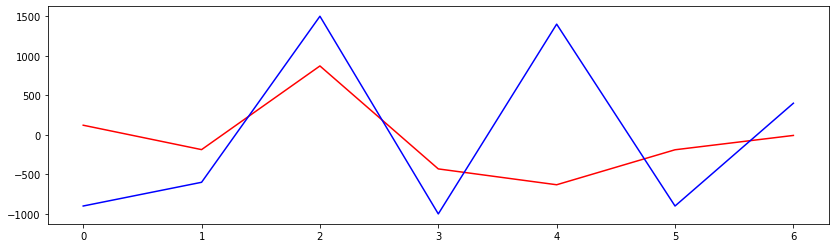

In [ ]:
plt.plot(predict_test, 'r')
plt.plot(actual_test, 'b')
plt.show()

주가예측 관련...

모델 LSTM, callback val_mae을 사용한다.
기본 거래데이터(종가, 시가, 고가, 저가, 거래량 등) 이외에 가격변동성(TR), 거래랑(OBV)지표를 사용한다.

결과 : validation set에서 추세는 일치시킬 수 있다. 그러나 이것은 튜닝과정에서 얻어지는 결과이며 예측력이라고는 할 수 없다.

그러면 validation set에서 최적모델이 test set에서는 예측력을 가질 수 있을까?
아직 그럴꺼 갖지 않다. 
가장 근본적인 문제는 주가의 경우 매일 새로운 데이터가 생성되고 이를 기반으로 내일 발생할 가격변동을 예측한다고 하더라도 그 예측이 얼마나 정확한 것인지 부정확한 것인지 알 수 가 없다는 것이다. 



In [ ]:
import os
print(os.getcwd())
print(os.listdir())

/content
['.config', 'my_model.h5', 'sample_data']


In [ ]:
!ls /content

my_model.h5  sample_data


다음은 합성곱 신경망을 활용해서 Conv1D로 예측한 사례이다.

In [ ]:
input4 = Input(shape=(5,7))
dense4 = Conv1D(32, 3, padding="same", activation='relu')(input4)
dense4 = MaxPooling1D(2)(dense4)
dense4 = Conv1D(32, 3, padding='same', activation='relu')(dense4)
dense4 = MaxPooling1D(2)(dense4)
dense4 = Flatten()(dense4)
dense4 = Dense(10, activation='relu')(dense4)
output4 = Dense(1)(dense4)

model4 = Model(inputs= input4, outputs=output4)

model4.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 5, 7)              0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 5, 32)             704       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2, 32)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 2, 32)             3104      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330 

In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=0.001)

In [ ]:
model4.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

In [ ]:
callback_list = ModelCheckpoint(filepath='my_model.h5', monitor='val_mae', save_best_only=True, save_weights_only=True, verbose=0)
early_stopping = EarlyStopping(monitor='val_mae', patience=50)
history4 = model4.fit(x_train_L5_r, y_train_L5, validation_data = (x_val_L5_r, y_val_L5), epochs=200, verbose=0, callbacks=[callback_list, early_stopping])

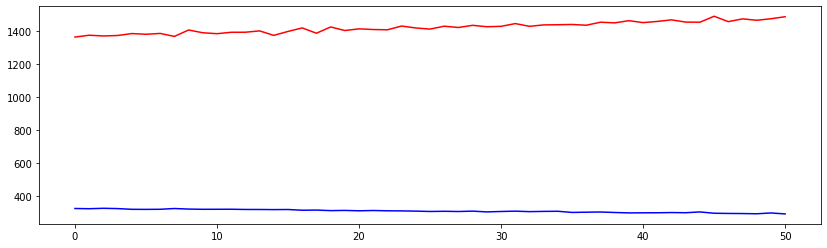

In [ ]:
plt.plot(history4.history['mae'], 'b')
plt.plot(history4.history['val_mae'], 'r')
plt.show()

In [ ]:
model4.load_weights("my_model.h5")

In [ ]:
predict_conv1 = model4.predict(x_val_L5_r)

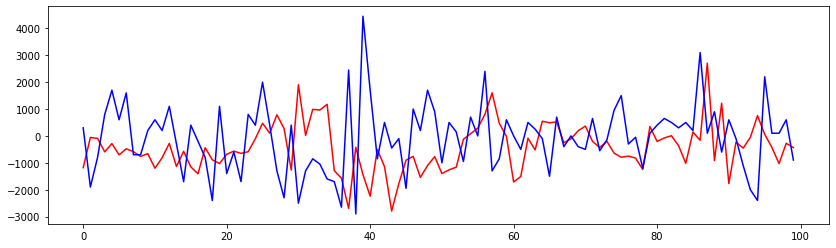

In [ ]:
plt.plot(predict_conv1, 'r')
plt.plot(y_val_L5, 'b')
plt.show()

LSTM CNN 앙상블 모델

In [ ]:
# LSTM

input2 = Input(shape=(5,7))
dense2 = LSTM(128, return_sequences=False)(input2)
dense2 = Dense(128)(dense2)
dense2 = Dense(64)(dense2)
dense2 = Dropout(0.5)(dense2)
dense2 = Dense(32)(dense2)
output2 = Dense(1)(dense2)


# Convolution1D

input4 = Input(shape=(5,7))
dense4 = Conv1D(32, 3, padding="same", activation='relu')(input4)
dense4 = MaxPooling1D(2)(dense4)
dense4 = Conv1D(32, 3, padding='same', activation='relu')(dense4)
dense4 = MaxPooling1D(2)(dense4)
dense4 = Flatten()(dense4)
dense4 = Dense(10, activation='relu')(dense4)
output4 = Dense(1)(dense4)

from keras.layers.merge import concatenate

merge = concatenate([output2, output4])
output6 = Dense(1)(merge)

model6 = Model(inputs =[input2, input4], outputs = output6)

model6.summary()


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 5, 7)         0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 5, 7)         0                                            
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 5, 32)        704         input_5[0][0]                    
__________________________________________________________________________________________________
lstm_3 (LSTM)                   (None, 128)          69632       input_4[0][0]                    
____________________________________________________________________________________________

In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=0.001)

In [ ]:
model6.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

In [ ]:
callback_list = ModelCheckpoint(filepath='my_model.h5', monitor='val_mae', save_best_only=True, save_weights_only=True, verbose=0)
early_stopping = EarlyStopping(monitor='val_mae', patience=50)
history6 = model6.fit([x_train_L5_r, x_train_L5_r], y_train_L5, validation_data = ([x_val_L5_r,x_val_L5_r], y_val_L5), epochs=200, verbose=0, callbacks=[callback_list, early_stopping])

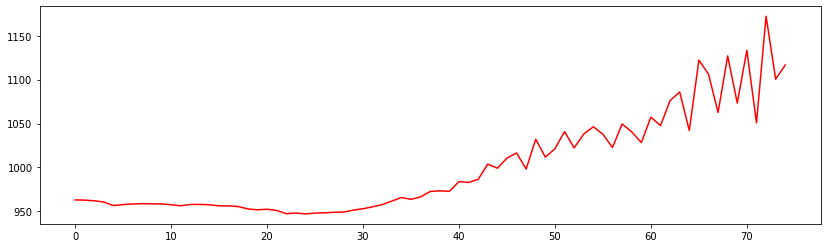

In [ ]:
#plt.plot(history6.history['mae'], 'b')
plt.plot(history6.history['val_mae'], 'r')
plt.show()

In [ ]:
np.min(history6.history['val_mae'])

947.0811767578125

In [ ]:
model6.load_weights("my_model.h5")

In [ ]:
predict_conv1_LSTM = model6.predict([x_val_L5_r,x_val_L5_r])

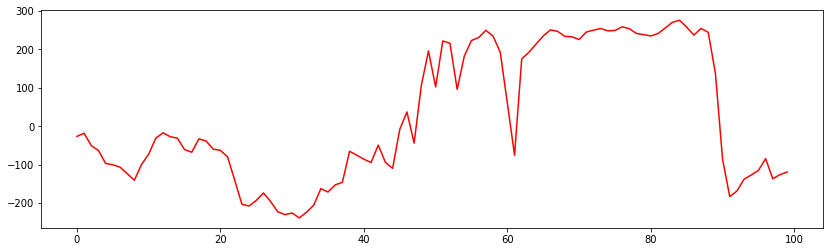

In [ ]:
plt.plot(predict_conv1_LSTM, 'r')
#plt.plot(y_val_L5, 'b')
plt.show()

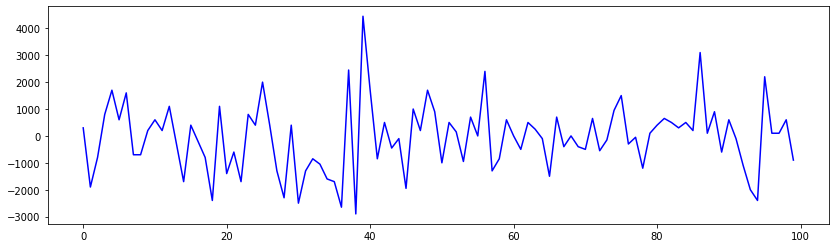

In [ ]:
#plt.plot(predict_conv1_LSTM, 'r')
plt.plot(y_val_L5, 'b')
plt.show()